In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df=pd.read_csv('mcdonalds.csv')

In [3]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

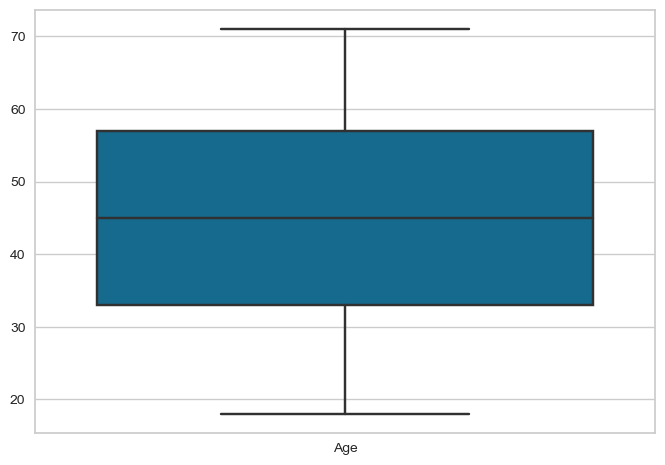

In [7]:
sns.boxplot(data=df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
df.shape

(1453, 15)

# Data Cleaning

In [10]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [11]:
df.duplicated().sum()

22

In [12]:
df.drop_duplicates()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [13]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [14]:
df['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [15]:
# Handle invalid entries in the 'Like' column
df['Like'] = df['Like'].replace({'I love it!+5': +5, 'I hate it!-5': -5}).astype(int)


In [16]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [17]:
# Handle invalid entries in the 'Like' column
#df['VisitFrequency'] = df['VisitFrequency'].replace({'I love it!+5': +5, 'I hate it!-5': -5}).astype(int)


In [18]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [19]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

 Check if the string contains 'never' and map it to 0 visits
 Check if the string contains 'once a year' and map it to 1 visit per year
 Check if the string contains 'every three months' and map it to 4 visits per year
 Check if the string contains 'once a month' and map it to 12 visits per year
 Check if the string contains 'once a week' and map it to 52 visits per year
 Check if the string contains 'more than once a week' and map it to 104 visits per year
 If none of the above conditions are met, return None for invalid or unrecognized values

In [20]:
# Standardize and map `VisitFrequency` values to integers
def clean_visit_frequency(value):
    value = str(value).strip().lower()
    if "never" in value:
        return 0
    elif "once a year" in value:
        return 1
    elif "every three months" in value:
        return 4  # Quarterly visits
    elif "once a month" in value:
        return 12  # Monthly visits
    elif "once a week" in value:
        return 52  # Weekly visits
    elif "more than once a week" in value:
        return 104  # Twice a week
    else:
        return None  # Mark invalid or unknown values as None
    
# Apply the `clean_visit_frequency` function to the 'VisitFrequency' column of the DataFrame
# This transforms the column's values based on the mappings defined above
df['VisitFrequency'] = df['VisitFrequency'].apply(clean_visit_frequency)


In [21]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,4,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,4,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,4,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,52,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,12,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,1,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,52,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,12,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,4,Male


Visualizations:
Bar Plot: Frequency of visits across all respondents.
Box Plot: Relationship between age and visit frequency.
Gender Distribution: Proportion of male vs. female respondents.
Heatmap: Correlation between numeric variables.
Stacked Bar Chart: Comparison of preferences (yummy, convenient, etc.) by gender.

# Data Visualization

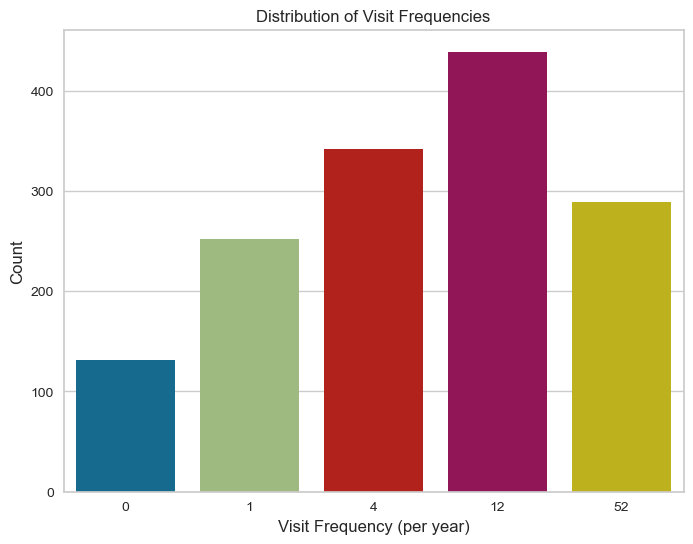

In [23]:
# Plot 1: Bar Plot for `VisitFrequency`
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitFrequency', data=df)
plt.title('Distribution of Visit Frequencies')
plt.xlabel('Visit Frequency (per year)')
plt.ylabel('Count')
plt.show()

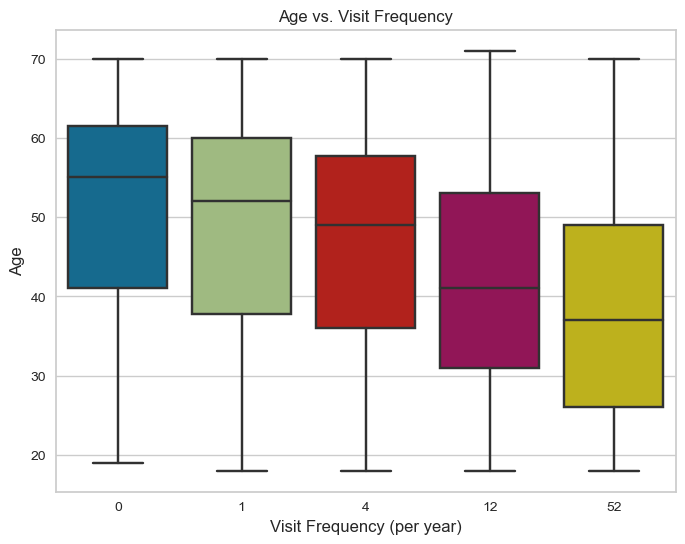

In [24]:
# Plot 2: Box Plot for `Age` vs. `VisitFrequency`
plt.figure(figsize=(8, 6))
sns.boxplot(x='VisitFrequency', y='Age', data=df)
plt.title('Age vs. Visit Frequency')
plt.xlabel('Visit Frequency (per year)')
plt.ylabel('Age')
plt.show()

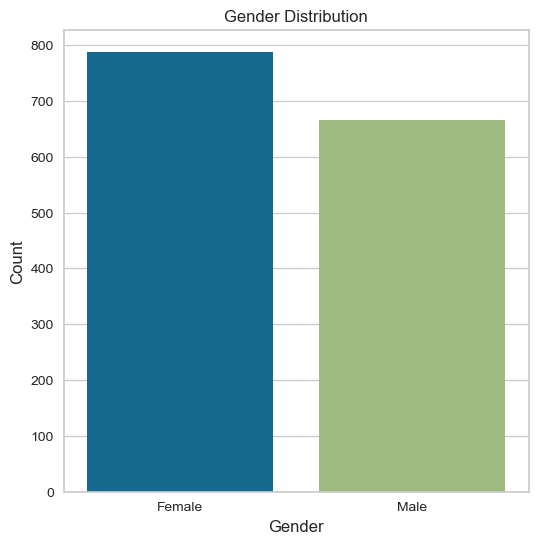

In [25]:
# Plot 3: Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

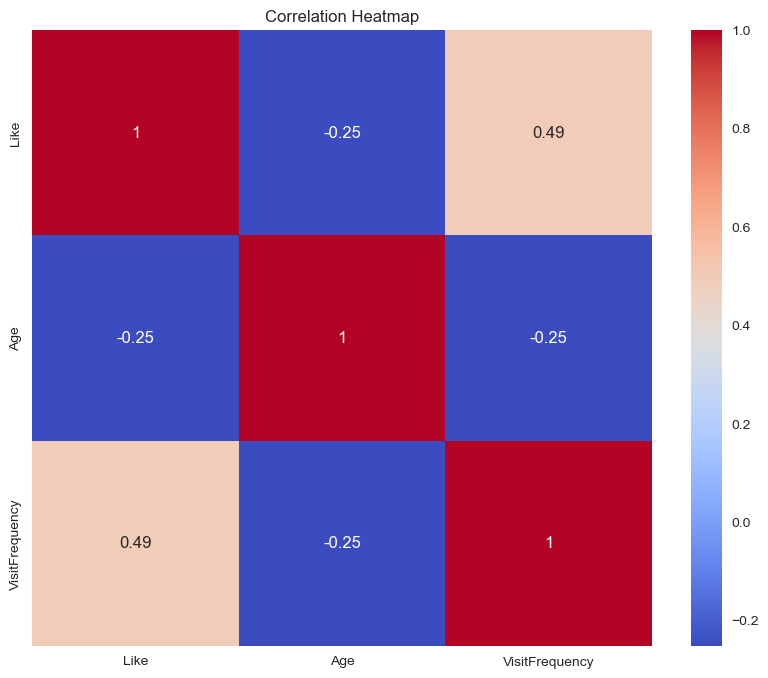

In [26]:
# Plot 4: Heatmap for Feature Correlation
plt.figure(figsize=(10, 8))
corr_matrix = df[['Like', 'Age', 'VisitFrequency']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


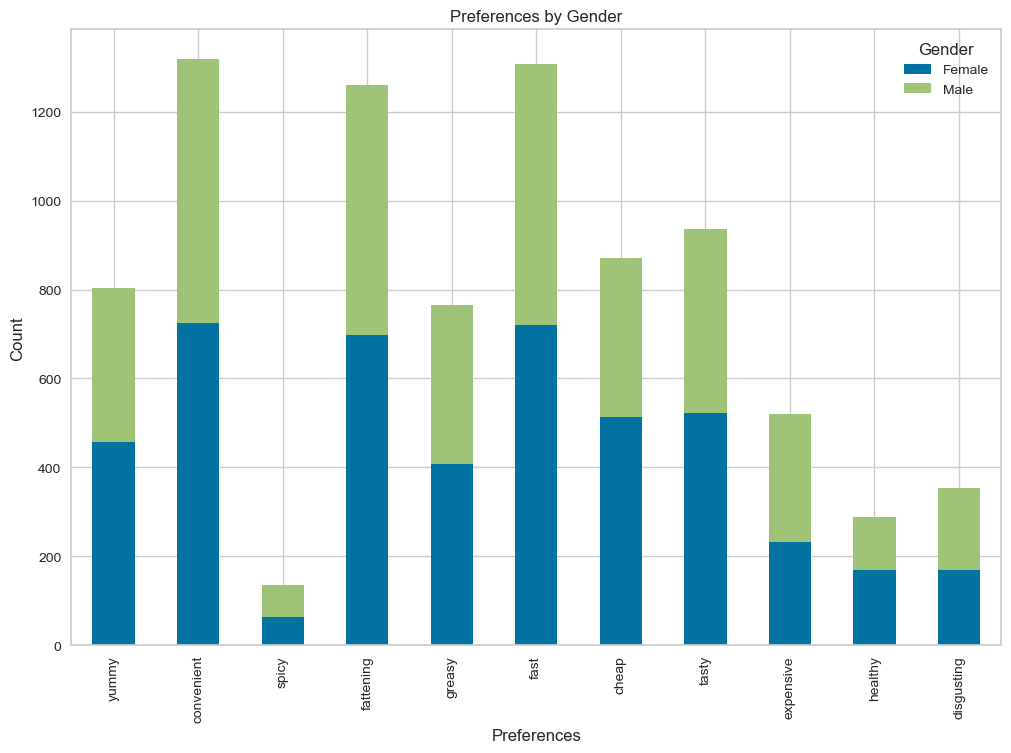

In [27]:
# Plot 5: Stacked Bar Chart for Preferences by Gender
preferences = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
gender_preferences = df.groupby('Gender')[preferences].apply(lambda x: (x == 'Yes').sum())

gender_preferences.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Preferences by Gender')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

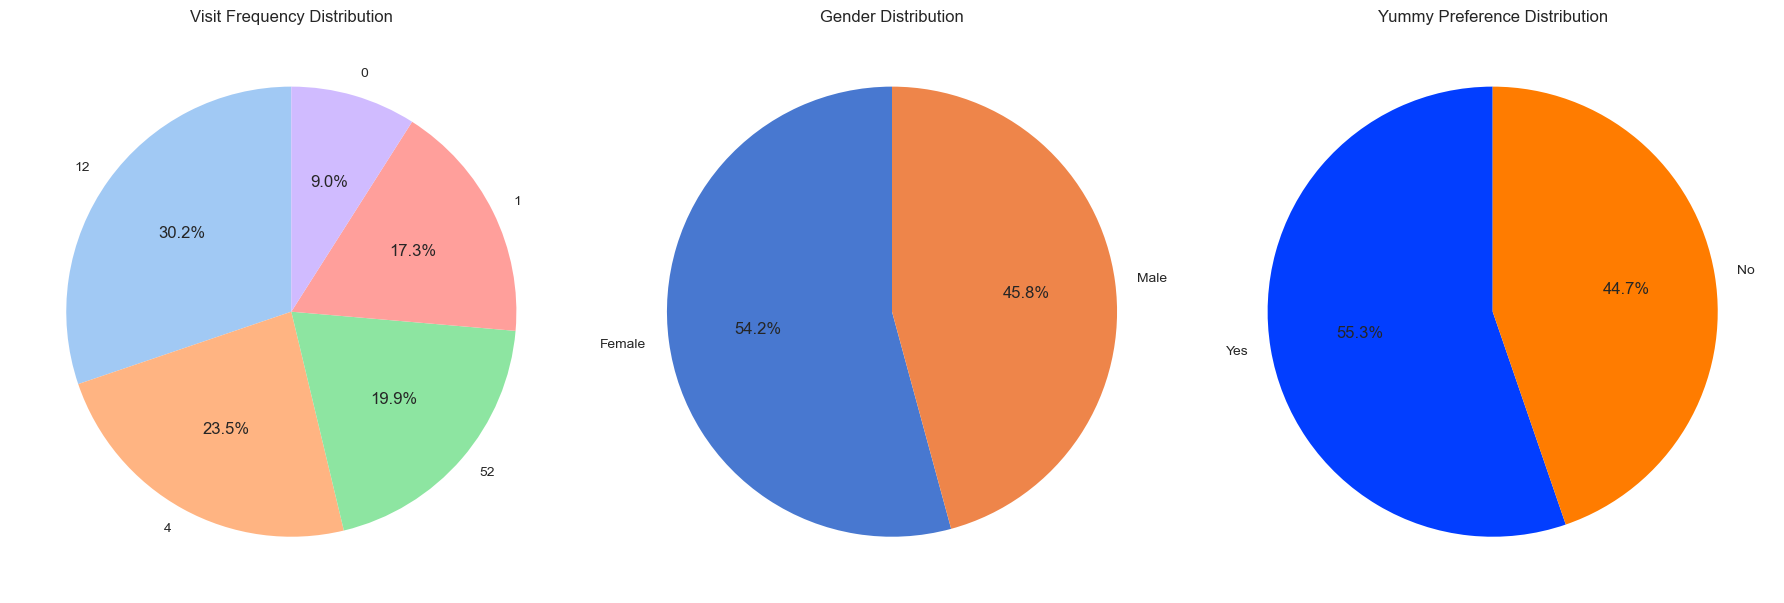

In [28]:
# Create subplots for all pie charts in one line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie Chart 1: Distribution of `VisitFrequency`
visit_freq_counts = df['VisitFrequency'].value_counts()
axes[0].pie(visit_freq_counts, labels=visit_freq_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0].set_title('Visit Frequency Distribution')

# Pie Chart 2: Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("muted"))
axes[1].set_title('Gender Distribution')

# Pie Chart 3: Preferences (e.g., "Yummy")
yummy_counts = df['yummy'].value_counts()
axes[2].pie(yummy_counts, labels=yummy_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("bright"))
axes[2].set_title('Yummy Preference Distribution')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

Explanation:
Subplots (plt.subplots(1, 3)): Creates a single row (1) with three columns (3), allowing the pie charts to be arranged horizontally.
axes[0], axes[1], and axes[2]: These are the individual axes where each pie chart is drawn.
plt.tight_layout(): Ensures that the subplots fit within the figure area without overlap

# Feature Scaling

In [22]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns that need to be label encoded
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']

# Apply Label Encoding for each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,52,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,52,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,12,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,4,1


In [25]:
# Standard Scaler for all variables
standard_scaler = StandardScaler()

# scale all variables
df_scaled = standard_scaler.fit_transform(df)

# convert scaled data back to dataframe
#df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [26]:
df_scaled

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.15325815,
        -0.5859626 , -0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.44983942,
        -0.5859626 , -0.918645  ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.22360002,
        -0.5859626 , -0.918645  ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.5201813 ,
        -0.16300996, -0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.2535793 ,
        -0.5859626 ,  1.08855979],
       [-1.11147857,  0.31873518, -0.32134871, ..., -1.0273399 ,
        -0.5859626 ,  1.08855979]])

In [27]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [28]:
df_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,-1.212225,1.153258,-0.585963,-0.918645
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,0.392515,0.449839,-0.585963,-0.918645
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,0.071567,1.223600,-0.585963,-0.918645
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,1.034411,1.715993,1.951753,-0.918645
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,0.392515,0.309156,-0.163010,1.088560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261,-1.854121,0.168472,-0.744570,1.088560
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488,0.392515,-0.605289,1.951753,-0.918645
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488,0.713463,0.520181,-0.163010,-0.918645
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488,1.034411,-0.253579,-0.585963,1.088560


In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Selecting all numerical features for clustering
# Since your data is already standardized, we can use all columns for clustering
X = df_scaled # Drop 'Gender' as it's categorical



In [30]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1453.0,-1.026937e-16,1.919709,-3.608880,-1.516553,-0.386746,1.342701,4.971505
col2,1453.0,4.890177e-18,1.356363,-2.889501,-1.085155,-0.073473,0.987682,3.336090
col3,1453.0,7.335266e-18,1.261927,-2.306826,-0.885872,-0.173676,0.732643,4.690097


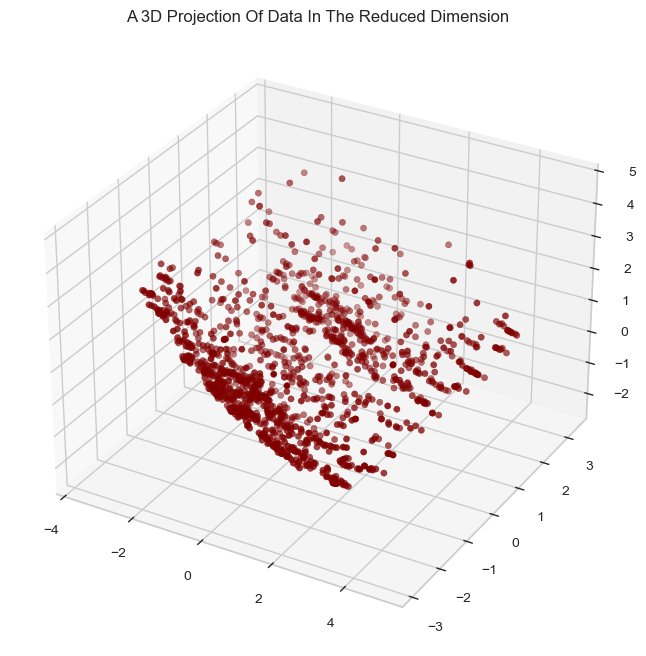

In [31]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


In [32]:
df_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,-1.212225,1.153258,-0.585963,-0.918645
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,0.392515,0.449839,-0.585963,-0.918645
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,0.071567,1.223600,-0.585963,-0.918645
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,1.034411,1.715993,1.951753,-0.918645
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,0.392515,0.309156,-0.163010,1.088560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261,-1.854121,0.168472,-0.744570,1.088560
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488,0.392515,-0.605289,1.951753,-0.918645
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488,0.713463,0.520181,-0.163010,-0.918645
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488,1.034411,-0.253579,-0.585963,1.088560


Elbow Method to determine the number of clusters to be formed:


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\clust

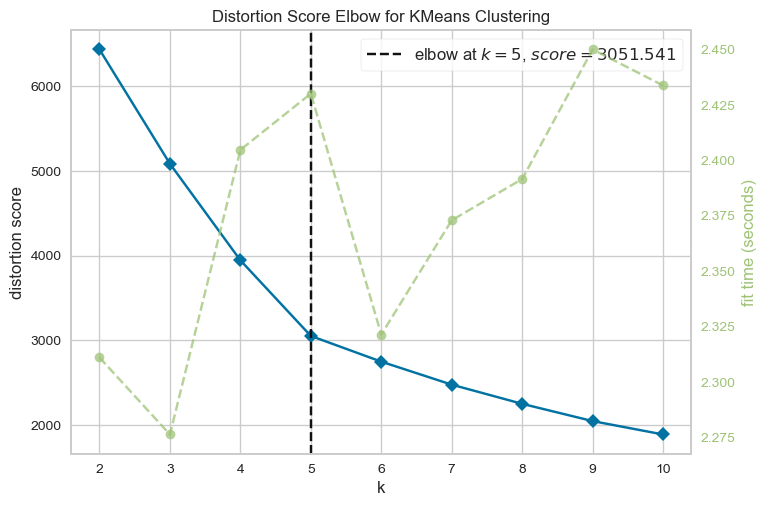

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [55]:
''''# Step 1: Ensure PCA_ds is a NumPy array with at least two dimensions
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Check and convert PCA_ds to NumPy array if needed
if isinstance(PCA_ds, pd.DataFrame):
    PCA_ds = PCA_ds.values
elif not isinstance(PCA_ds, np.ndarray):
    raise ValueError("PCA_ds must be a DataFrame or a NumPy array.")

# Check shape
if PCA_ds.shape[1] < 2:
    raise ValueError("PCA_ds must have at least two dimensions for plotting.")

# Step 2: Fit KMeans model with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(PCA_ds)
kmeans_labels = kmeans.labels_

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Save the figure
plt.savefig('kmeans_clustering.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
'''

'\'# Step 1: Ensure PCA_ds is a NumPy array with at least two dimensions\nimport numpy as np\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\n\n# Check and convert PCA_ds to NumPy array if needed\nif isinstance(PCA_ds, pd.DataFrame):\n    PCA_ds = PCA_ds.values\nelif not isinstance(PCA_ds, np.ndarray):\n    raise ValueError("PCA_ds must be a DataFrame or a NumPy array.")\n\n# Check shape\nif PCA_ds.shape[1] < 2:\n    raise ValueError("PCA_ds must have at least two dimensions for plotting.")\n\n# Step 2: Fit KMeans model with 5 clusters\nn_clusters = 5\nkmeans = KMeans(n_clusters=n_clusters, random_state=42)\nkmeans.fit(PCA_ds)\nkmeans_labels = kmeans.labels_\n\n# Step 3: Visualize the clusters\nplt.figure(figsize=(8, 6))\nplt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels, cmap=\'viridis\', s=50)\nplt.title(\'KMeans Clustering with 5 Clusters\')\nplt.xlabel(\'PCA Component 1\')\nplt.ylabel(\'PCA Component 2\')\nplt.colorbar(label=\'Cluster Label\')\n\n# Save t

In [36]:
# Ensure PCA_ds is a NumPy array
PCA_ds = PCA_ds.values  # Convert DataFrame to NumPy array if it's a DataFrame
PCA_ds

array([[ 1.48117356, -1.22878804,  0.40830209],
       [-0.57828823,  0.44127818, -0.87421827],
       [ 0.28116752,  0.46265316,  1.44309378],
       ...,
       [-0.85181299,  1.22492191,  0.53143995],
       [-2.49722664, -0.98528419,  2.04764955],
       [ 3.42749634,  2.13692076,  0.18112926]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


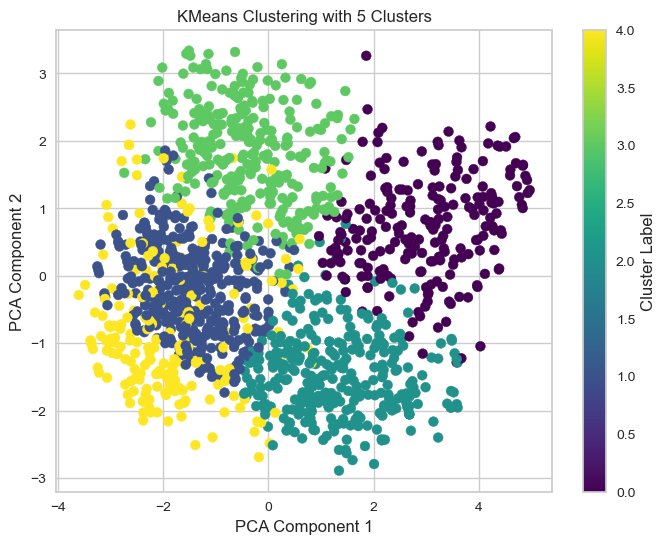

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# If PCA_ds is already a NumPy array, you don't need to convert it
# Fit KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(PCA_ds)  # Fit the model to the dataset
kmeans_labels = kmeans.labels_  # Get the cluster labels for each data point

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Save the plot as an image
plt.savefig('kmeans_clustering.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [40]:
from sklearn.cluster import DBSCAN
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
dbscan_labels = dbscan.fit_predict(PCA_ds)  # Get the DBSCAN cluster labels


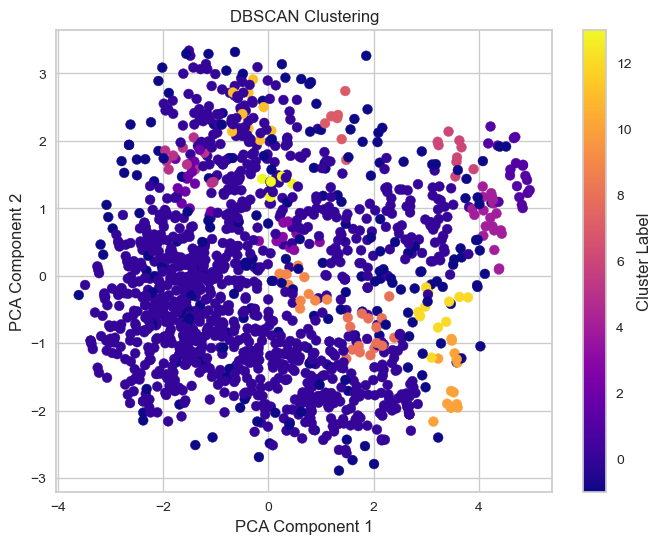

In [42]:
# DBSCAN visualization
plt.figure(figsize=(8, 6))
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Save the figure
#plt.savefig('clustering_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

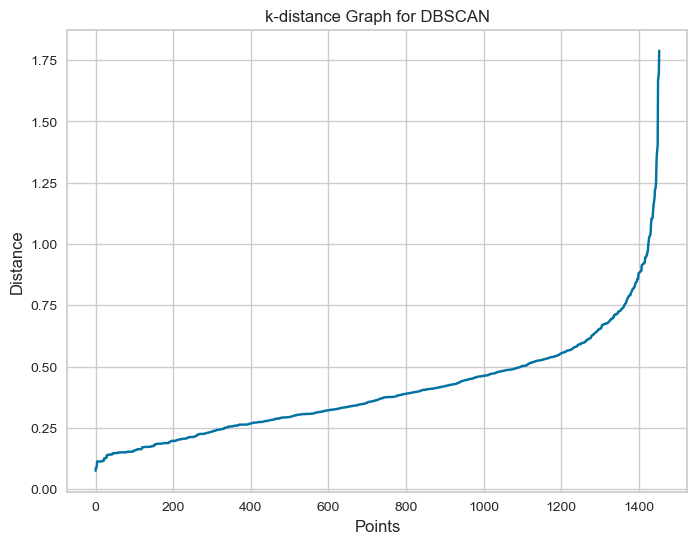

In [45]:
from sklearn.neighbors import NearestNeighbors

# k-distance plot for DBSCAN
knn = NearestNeighbors(n_neighbors=5)
knn.fit(PCA_ds)
distances, indices = knn.kneighbors(PCA_ds)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, 4], axis=0)  # 4th nearest neighbor
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# From the graph, manually select `eps` value (e.g., around the "elbow" in the graph)
# Adjust `eps` and `min_samples` based on the k-distance graph
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)


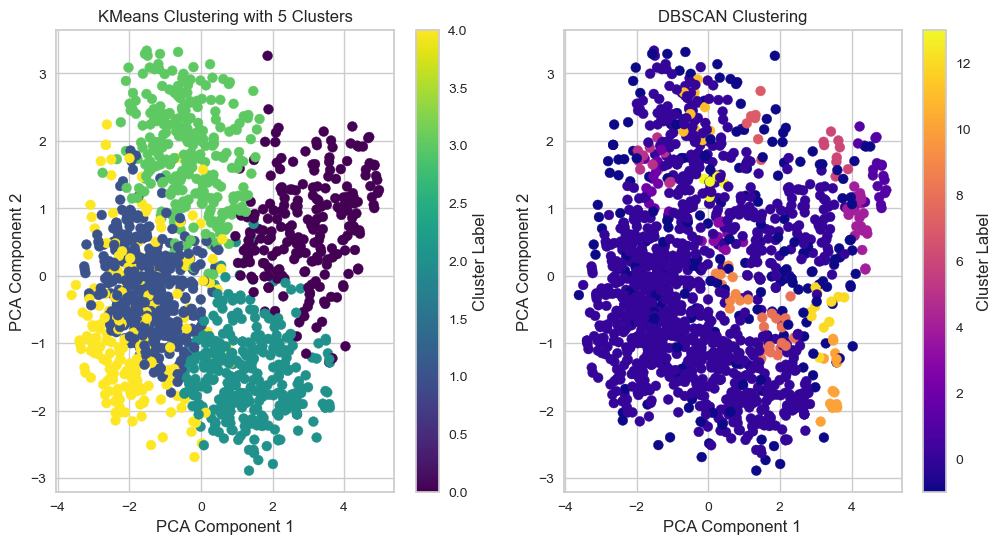

In [46]:
# Visualize KMeans Clusters and DBSCAN Clusters
plt.figure(figsize=(12, 6))

# KMeans visualization
plt.subplot(1, 2, 1)
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# DBSCAN visualization
plt.subplot(1, 2, 2)
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Save the figure
plt.savefig('clustering_comparison_improved.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [48]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8],  # Number of clusters to test
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20],  # Number of initializations to perform
    'max_iter': [300, 400],  # Maximum number of iterations per initialization
    'tol': [1e-4, 1e-3],  # Tolerance for convergence
    'algorithm': ['auto', 'full', 'elkan'],  # Algorithm options
}

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Best Hyperparameters found:  {'algorithm': 'auto', 'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 10, 'tol': 0.001}


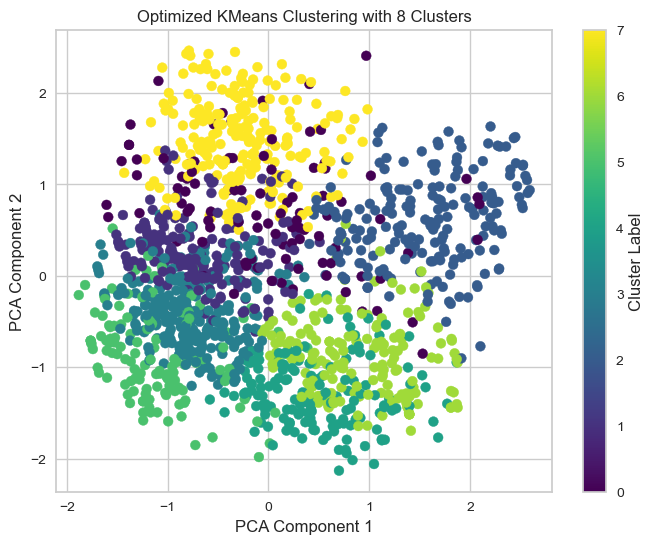

In [49]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the PCA data
#scaler = StandardScaler()
#PCA_ds_scaled = scaler.fit_transform(PCA_ds)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8],  # Number of clusters to test
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20],  # Number of initializations to perform
    'max_iter': [300, 400],  # Maximum number of iterations per initialization
    'tol': [1e-4, 1e-3],  # Tolerance for convergence
    'algorithm': ['auto', 'full', 'elkan'],  # Algorithm options
}

# Initialize the KMeans model
kmeans = KMeans(random_state=42)

# Initialize GridSearchCV with the KMeans model and parameter grid
grid_search = GridSearchCV(kmeans, param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV to the scaled data
grid_search.fit(PCA_ds_scaled)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters found: ", best_params)

# Get the best KMeans model
best_kmeans = grid_search.best_estimator_

# Fit the best KMeans model to the data
best_kmeans_labels = best_kmeans.labels_

# Visualize the best KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(PCA_ds_scaled[:, 0], PCA_ds_scaled[:, 1], c=best_kmeans_labels, cmap='viridis', s=50)
plt.title(f'Optimized KMeans Clustering with {best_params["n_clusters"]} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Save the figure
plt.savefig('optimized_kmeans_clustering.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [57]:
from sklearn.metrics import silhouette_score
# 3. Calculate Silhouette Scores

# Silhouette Score for KMeans
sil_score_kmeans = silhouette_score(PCA_ds, kmeans_labels)
print(f"Silhouette Score for KMeans (5 clusters): {sil_score_kmeans:.3f}")




Silhouette Score for KMeans (5 clusters): 0.352


In [59]:
# Exclude noise points (label -1) for silhouette score calculation
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]

# Calculate the Silhouette Score for DBSCAN (after excluding noise points)
if len(dbscan_labels_filtered) > 1:
    sil_score_dbscan = silhouette_score(PCA_ds[dbscan_labels != -1], dbscan_labels_filtered)
    print(f"Silhouette Score for DBSCAN: {sil_score_dbscan:.3f}")
else:
    print("DBSCAN did not form enough valid clusters to compute the Silhouette Score.")

Silhouette Score for DBSCAN: -0.296


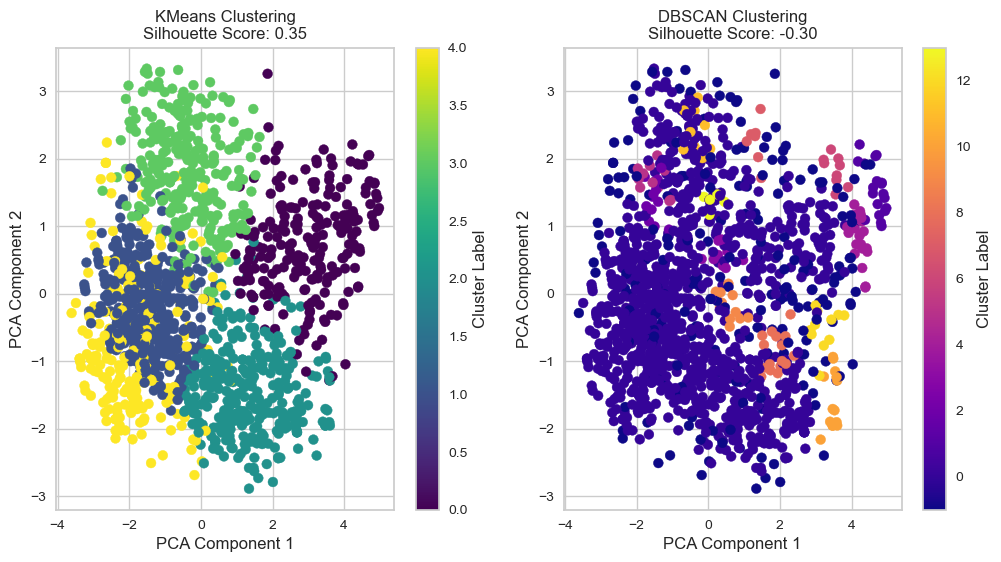

In [60]:
# 3. Visualize the Clusters for Both KMeans and DBSCAN

plt.figure(figsize=(12, 6))

# KMeans visualization
plt.subplot(1, 2, 1)
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'KMeans Clustering\nSilhouette Score: {sil_score_kmeans:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# DBSCAN visualization
plt.subplot(1, 2, 2)
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title(f'DBSCAN Clustering\nSilhouette Score: {sil_score_dbscan:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()